<div style="text-align: center; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
Model of high and low PUFAs effects on TREK-1 activity_N.Po Model_submit in Biophysical journal
</div>



<div style="text-align: left; color: rgb(109, 7, 26); font-weight: normal; font-size: 16px;">
Used libraries (JupyterLab/Python) </div>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sympy import symbols, Eq, solve
import pandas as pd
import sys
from scipy.stats import beta

<br>
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: normal; font-size: 16px;">
Glossary</div>
<br>

In the simulation/model :  

- **I<sub>0</sub>** refers to the initial current of TREK-1 channel 
- **I<sub>max</sub>** refers to the current elicited upon TREK-1 activation by PUFAs
- **I<sub>max_min</sub>** and **I<sub>0_max</sub>** refer to extreme values of the two groups I<sub>0</sub> and I<sub>max</sub> as illustrated in the following graph 1.
<br>
<br>
- **G** refers to the conductance.
- **Em** refers to the membrane potential.
- **Po** refers to the open probability.
- **γ** refers to the unitary conductance.
<br>
<br>
- **N<sub>total</sub>** refers to the total number of channels contributing to the conductance.
- **G<sub>0</sub>** refers to the conductance before the activation by PUFAs (time point = 0).
- **Po<sub>0</sub>** refers to the open probability before the activation by PUFAs (time point = 0).
- **G<sub>max</sub>** refers to the conductance upon the activation by PUFAs.

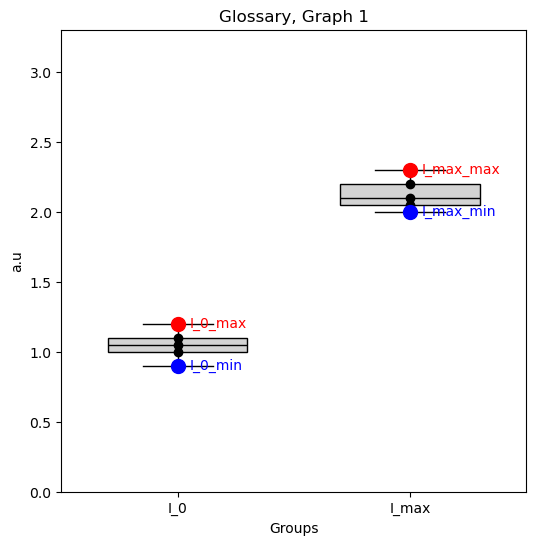

In [152]:
# Graph 1 : I_max_min and I_0_max
## Box plots initiation with arbitrary unit (a.u) :
I0 = np.array([1, 1.2, 1.1, 0.9, 1.05])
Imax = np.array([2, 2.1, 2.3, 2.2, 2.05])

# Box plots positions
positions = [1, 2]  # 1 for I_0 and 2 for I_max

# Creating the figure
plt.figure(figsize=(6,6))

plt.boxplot([I0, Imax], positions=positions, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='black'))

plt.scatter(np.ones(len(I0))*positions[0], I0, color='black', zorder=5)
plt.scatter(np.ones(len(Imax))*positions[1], Imax, color='black', zorder=5)


# Identifying and highlighting  extreme values
I0_max = I0.max()
I0_min = I0.min()
Imax_max = Imax.max()
Imax_min = Imax.min()

plt.scatter(positions[0], I0_max, color='red', s=100, zorder=6)
plt.text(positions[0]+0.05, I0_max, 'I_0_max', color='red', va='center')

plt.scatter(positions[0], I0_min, color='blue', s=100, zorder=6)
plt.text(positions[0]+0.05, I0_min, 'I_0_min', color='blue', va='center')

plt.scatter(positions[1], Imax_max, color='red', s=100, zorder=6)
plt.text(positions[1]+0.05, Imax_max, 'I_max_max', color='red', va='center')

plt.scatter(positions[1], Imax_min, color='blue', s=100, zorder=6)
plt.text(positions[1]+0.05, Imax_min, 'I_max_min', color='blue', va='center')

# Labels et title
plt.xticks(positions, ['I_0', 'I_max'])
plt.ylabel('a.u')
plt.xlabel('Groups')
plt.title('Glossary, Graph 1')
plt.xlim(0.5, 2.5)
plt.ylim(0, max(Imax)+1)

plt.show()




<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
Part 1 : Theoretical definition of model parameters </div>  

<br>  

<span style="color: rgb(109, 7, 26);"> <b>1)</b> Based on experimental observations (<i>Bechard et al., 2024 and Bechard et al., under submission</i>), the model must incorporate the following conditions: </span>  
<br> 

<span style="color:dark; font-weight:bold;">Biophysic parameters of the system : </span>

- I<sub>0</sub> follows a Beta distribution of α and β parameters, with α < β.     
- I<sub>0</sub> has a coefficient of variation of ~64 %.  
- I<sub>max</sub> follows a Beta distribution of α and β parameters, with α = β.        
- I<sub>max</sub> has a coefficient of variation of ~41%.     <br>
⇒ the system gets organized.

<br>  

<span style="color:dark; font-weight:bold;"> Expected changes in the system due to PUFA exposures :</span>

- **I<sub>max</sub> > I<sub>0</sub>**, for each PUFA.
- **I<sub>max</sub> is idependent of I<sub>0</sub>** : the initial activity does not determine the final activity.<br>
- **I<sub>max_min</sub> > I<sub>0_max</sub>**, for strong PUFAs such as DHA and LA whereas this is not necessarily the case for weak PUFAs.   <br>
⇒ If x: I<sub>0</sub> and y: I<sub>max</sub>, then I<sub>max</sub> values will lie above the line defined by y = x.  

<br>
<br>

<span style="color: rgb(109, 7, 26);"> <b>2)</b> Accordingly, we define the model parameters in terms of conductance as follows : </span>    

Using : I = G * (Em-E<sub>K</sub>) → **G = γ * N * Po**
<br>

- **G<sub>0</sub> = γ * N<sub>total</sub> * Po<sub>0</sub>**,   with Po<sub>0</sub> following a Beta distribution with parameters α < β, which determines the distribution of G<sub>0</sub>.  

- **G<sub>max</sub> = (gamma * N<sub>0</sub> * Po)' + (gamma * N<sub>acc</sub> * Po<sub>max</sub>)** <br>
With :    
**(N<sub>0</sub> * Po)'** : the fraction of channels not accessible, then not activated by PUFAs, with N<sub>0</sub> = N<sub>total</sub>-N<sub>acc</sub> and teh same Po than G<sub>0</sub> condition.    
**(N<sub>acc</sub> * Po<sub>max</sub>)** : the fraction of channels accessible to PUFAs, then activated by PUFAs, whith N<sub>acc</sub> = N<sub>total</sub>-N<sub>0</sub> et Po<sub>max</sub> > Po<sub>0</sub>.


<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
Part 2 : Python definition of model parameters </div>  

In [164]:
## Definition of variables

mean_CTL = 0.02 # Fixed value of Po to be used for the esperance E(X) in the Beta distribution of G_0 and G_max
mean_PUFA = 0.5 # Fixed value of Po to be used for the esperance E(X) in the Beta distribution of G_max from N_acc

std_CTL_100 = 64 # Coefficient of variation corresponding to the ewperimental I_0 
std_PUFA_100 = 40 # Coefficient of variation corresponding to the ewperimental I_max (I_PUFA) 
std_CTL = std_CTL_100*mean_CTL/100
std_PUFA = std_PUFA_100*mean_PUFA/100

nb_cell = 30 # number n of simulated cells

gamma = 1 # When considered constant during the simulation
gamma_max = 3 # Bhen considered to be increased by PUFA

N = 500  # Correspond to the N_total of channels

N_acc_strong = 0.9*N  # Represents the number of channels activated by PUFAs, i.e., the number of channels available for interaction. 
                      # This value will follow a distribution.
                      # Parameter chosen to explain the independence of experimental I_0 and I_max.
N_acc_low = 0.6*N

Po_max = 0.5 # Po, which will be associated with N_acc for G_max, without assuming a distribution

<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
a - The initial conductance G<sub>0</sub></div>  

<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
<u>Figure 1</u> : Simulated distributions of Po, contributing to the G<sub>0</sub> distribution</div>  

Text(0.5, 1.0, 'Figure 1A : distribution of Po')

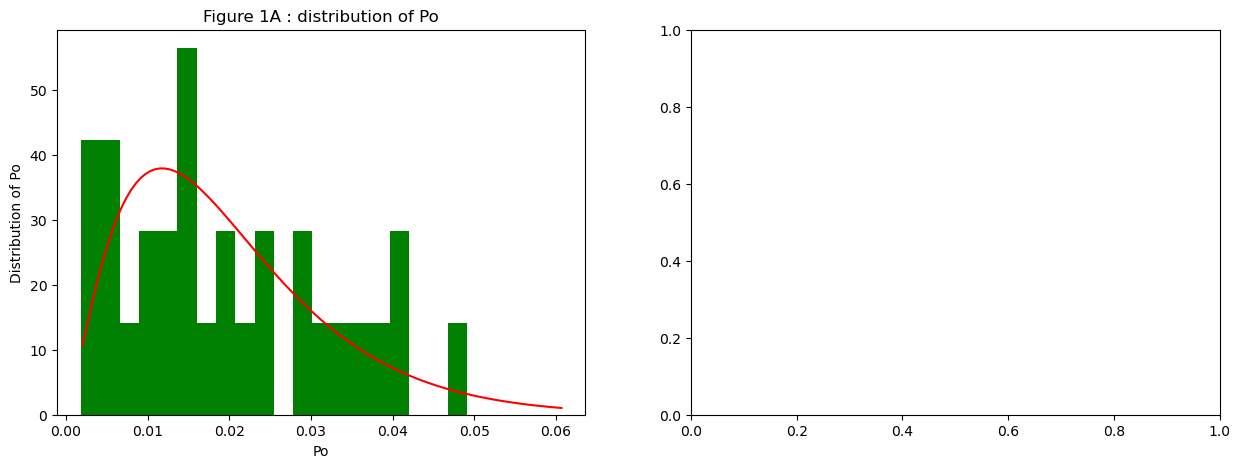

In [192]:
## To define G_0
# Defining teh Beta distribution of α and β parameters, with α < β since µ=0.02 < 0.5.

x, y = symbols("x y")
eq1 = Eq((x / (x + y)), mean_CTL) # Esperance of the Beta distribution with µ = 0.02  ⇒ (µ = α/(α+β)).
eq2 = Eq(x * y / ((x + y) ** 2 * (x + y + 1)), std_CTL ** 2) # variance of the Beta distribution.
a, b = solve((eq1, eq2), (x, y))[0] # Solve eq1 and eq2 and [0] gives the first pair (a,b) of the solution.
a, b = float(a), float(b) # Converts the object into a number.

# To give the distribution of Po and calculate G_0.
Po = beta.rvs(a, b, size=nb_cell) # Random distribution (rvs) of Po_0, which will give the distribution of G_0
Go = gamma * N * Po

## Creating teh distribution histogram of Po at the Time point = 0
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Figure 1A : distribution of Po_0
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100) 
axes[0].hist(Po, bins=20, density=True, histtype='bar', color = 'green')
axes[0].plot(x, beta.pdf(x, a, b), color = 'red')  # To plot the red line.
axes[0].set_xlabel('Po')
axes[0].set_ylabel('Distribution of Po')
axes[0].set_title('Figure 1A : distribution of Po')

<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
b - The maximal conductance G<sub>max</sub> upon PUFA activation</div>  

<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
<u>Figure 2</u> : Simulated Beta distributions of N<sub>act</sub> and G<sub>max</sub></div>  

In [201]:
## To define G_max
# Defining the Beta distribution of α and β parameters, with α = β since µ = 0.5.

x, y = symbols("x y")
eq1 = Eq((x / (x + y)), mean_PUFA)
eq2 = Eq(x * y / ((x + y) ** 2 * (x + y + 1)), std_PUFA ** 2)
a2, b2 = solve((eq1, eq2), (x, y))[0]
a2, b2 = float(a2), float(b2)


## Give the distribution of N_acc as N_act and calculate G_max
## For strong PUFA 
N_act_strong = N_acc_strong * beta.rvs(a2, b2, size=nb_cell)  # Distribution of N_act for G_max, the number of channels activated by PUFAs
#  Strong PUFA with a constant gamma :
Gmax_strong1 = N_act_strong * gamma * Po_max + (N - N_act_strong) * gamma * Po # simu de la G_max qui rend compte de l'indépendance de I_max vs I_0
#  Strong PUFA with an increasing gamma, defined as Gamma_max :
Gmax_strong2 = N_act_strong * gamma_max * Po_max + (N - N_act_strong) * gamma * Po 


## For weak PUFA 
N_act_low = N_acc_low * beta.rvs(a2, b2, size=nb_cell)
# Weak PUFA with a constant gamma
Gmax_low1 = N_act_low * gamma * Po_max + (N - N_act_low) * gamma * Po 
# Weak PUFA with an increasing gamma_max
Gmax_low2 = N_act_low * gamma_max * Po_max + (N - N_act_low) * gamma * Po 

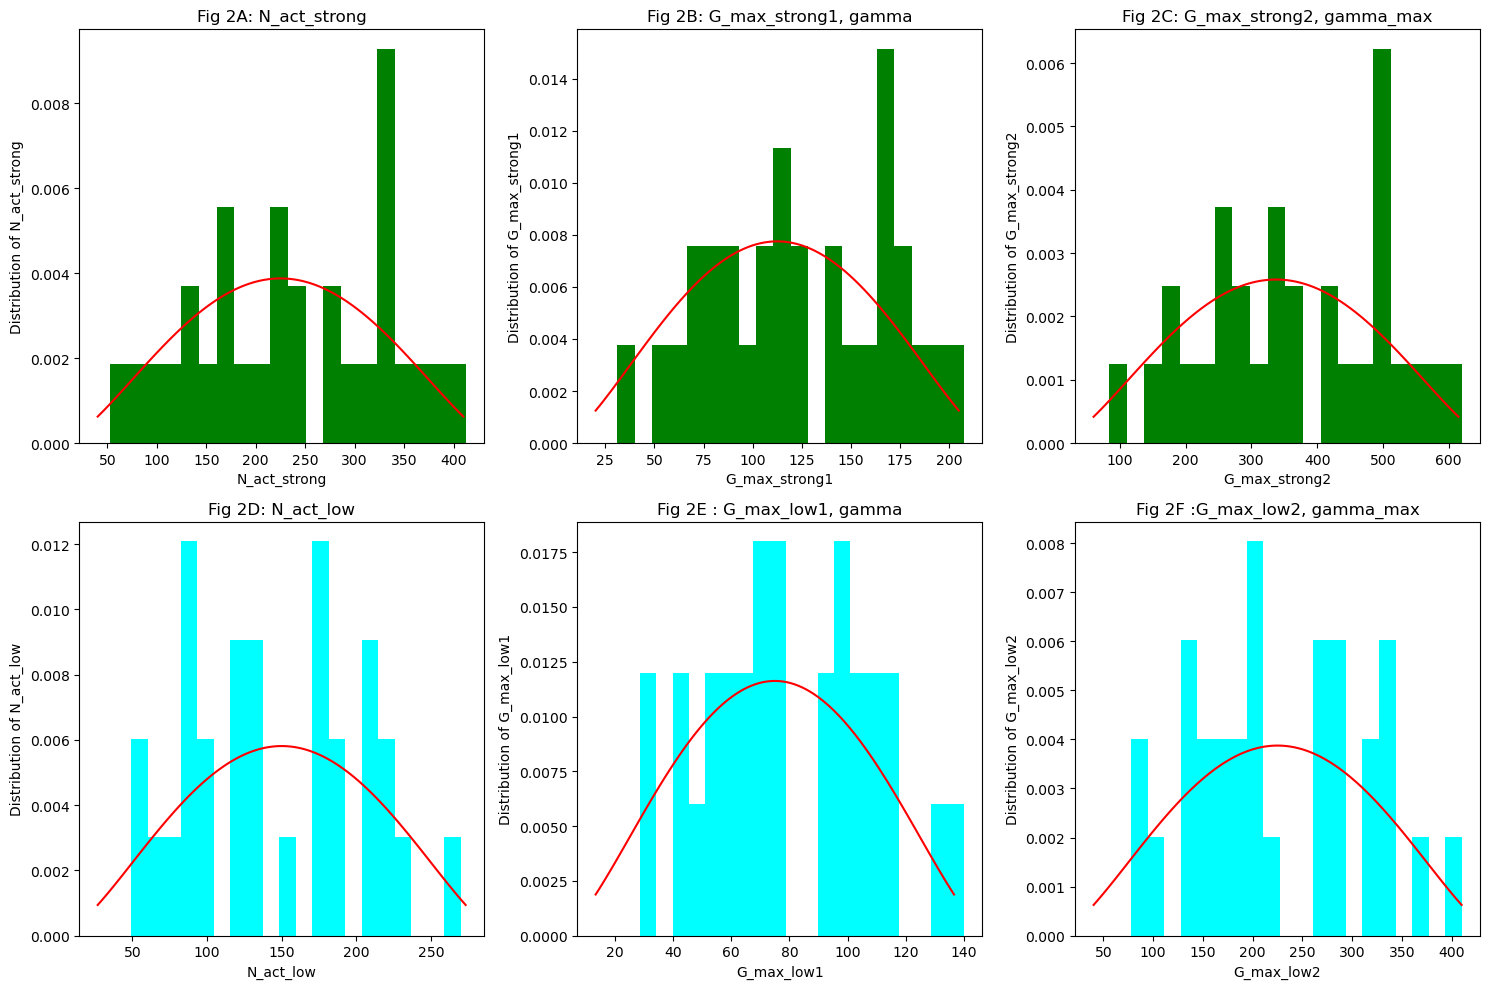

In [209]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


# Figure 2A : distribution of N_act_strong
x = N_acc_strong * np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
axes[0,0].hist(N_act_strong, bins=20, density=True, histtype='bar', color = 'green')
axes[0,0].plot(x, beta.pdf(x / N_acc_strong, a2, b2) / N_acc_strong, color = 'red')  # pour, color = 'green' tracer le "fit" de la distribution de N_act
axes[0,0].set_xlabel('N_act_strong')
axes[0,0].set_ylabel('Distribution of N_act_strong')
axes[0,0].set_title('Fig 2A: N_act_strong')

# Figure 2B : distribution of G_max_strong1 with constant gamma
x = gamma * Po_max * N_acc_strong * np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
axes[0,1].hist(Gmax_strong1, bins=20, density=True, histtype='bar', color = 'green')
axes[0,1].plot(x, beta.pdf(x / (gamma * Po_max * N_acc_strong), a2, b2) / (gamma * Po_max * N_acc_strong), color = 'red')  
axes[0,1].set_xlabel('G_max_strong1')
axes[0,1].set_ylabel('Distribution of G_max_strong1')
axes[0,1].set_title('Fig 2B: G_max_strong1, gamma')

# Figure 2C : distribution of G_max_strong2 with gamma_max
x = gamma_max * Po_max * N_acc_strong * np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
axes[0,2].hist(Gmax_strong2, bins=20, density=True, histtype='bar', color = 'green')
axes[0,2].plot(x, beta.pdf(x / (gamma_max * Po_max * N_acc_strong), a2, b2) / (gamma_max * Po_max * N_acc_strong), color = 'red') 
axes[0,2].set_xlabel('G_max_strong2')
axes[0,2].set_ylabel('Distribution of G_max_strong2')
axes[0,2].set_title('Fig 2C: G_max_strong2, gamma_max')

# Figure 2D : distribution of N_act_low
x = N_acc_low * np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
axes[1,0].hist(N_act_low, bins=20, density=True, histtype='bar', color = 'cyan')
axes[1,0].plot(x, beta.pdf(x / N_acc_low, a2, b2) / N_acc_low, color = 'red')  
axes[1,0].set_xlabel('N_act_low')
axes[1,0].set_ylabel('Distribution of N_act_low')
axes[1,0].set_title('Fig 2D: N_act_low')

# Figure 2E :distribution of G_max_low1 with constant gamma
x = gamma * Po_max * N_acc_low * np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
axes[1,1].hist(Gmax_low1, bins=20, density=True, histtype='bar', color = 'cyan')
axes[1,1].plot(x, beta.pdf(x / (gamma * Po_max * N_acc_low), a2, b2) / (gamma * Po_max * N_acc_low), color = 'red')  
axes[1,1].set_xlabel('G_max_low1')
axes[1,1].set_ylabel('Distribution of G_max_low1')
axes[1,1].set_title('Fig 2E : G_max_low1, gamma')

# Figure 2F : distribution of G_max_low2 with gamma_max
x = gamma_max * Po_max * N_acc_low * np.linspace(beta.ppf(0.01, a2, b2), beta.ppf(0.99, a2, b2), 100)
axes[1,2].hist(Gmax_low2, bins=20, density=True, histtype='bar', color = 'cyan')
axes[1,2].plot(x, beta.pdf(x / (gamma_max * Po_max * N_acc_low), a2, b2) / (gamma_max * Po_max * N_acc_low), color = 'red') 
axes[1,2].set_xlabel('G_max_low2')
axes[1,2].set_ylabel('Distribution of G_max_low2')
axes[1,2].set_title('Fig 2F :G_max_low2, gamma_max')


plt.tight_layout()
plt.show()

<br>  
<br>  
<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
<u>Figure 3</u> : Simulated kinetic of activations</div>  



In [213]:
def f(t, a, b, c): # a = sigmoïde slope, b = top, c = bottom
    return (b - c) / (1 + np.exp(-a * (t - 1))) + c # sigmoid equation

t = np.linspace(0, 5, 30)

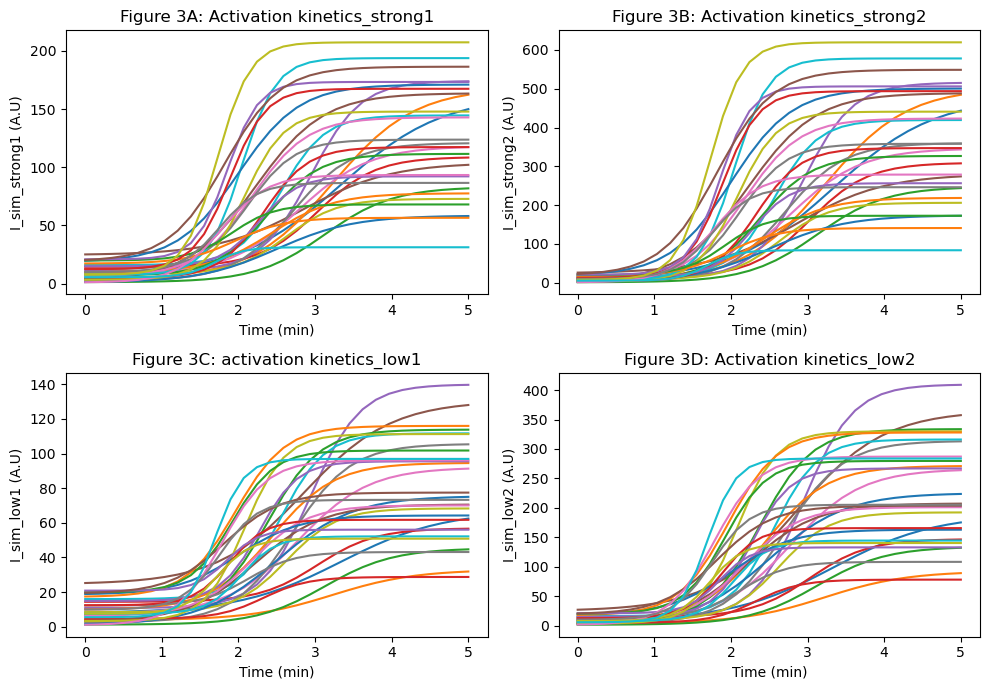

In [215]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Figure 3A : activation kinetic from G_0 to Gmax_strong1 with constant gamma
kinetics_strong1 = []  # initialize list
for i in range(nb_cell):
    kinetic = f((0.3 + 0.01 * i) * t, i % 5 + 5, Gmax_strong1[i], Go[i])
    kinetics_strong1.append(kinetic)
    axes[0, 0].plot(t, kinetic, label=str(i))

axes[0, 0].set_ylabel("I_sim_strong1 (A.U)")
axes[0, 0].set_xlabel('Time (min)')
axes[0, 0].set_title('Figure 3A: Activation kinetics_strong1')

# Figure 3B : activation kinetic from G_0 to Gmax_strong2 with gamma_max
kinetics_strong2 = [] 
for i in range(nb_cell):
    kinetic = f((0.3 + 0.01 * i) * t, i % 5 + 5, Gmax_strong2[i], Go[i])
    kinetics_strong2.append(kinetic)
    axes[0, 1].plot(t, kinetic, label=str(i))

axes[0, 1].set_ylabel("I_sim_strong2 (A.U)")
axes[0, 1].set_xlabel('Time (min)')
axes[0, 1].set_title('Figure 3B: Activation kinetics_strong2')

# Figure 3C : activation kinetic from G_0 to Gmax_low1 with constant gamma
kinetics_low1 = [] # initialisation de la liste
for i in range(nb_cell):
    kinetic = f((0.3 + 0.01 * i) * t, i % 5 + 5, Gmax_low1[i], Go[i])
    kinetics_low1.append(kinetic)
    axes[1, 0].plot(t, kinetic, label=str(i))

axes[1, 0].set_ylabel("I_sim_low1 (A.U)")
axes[1, 0].set_xlabel('Time (min)')
axes[1, 0].set_title('Figure 3C: activation kinetics_low1')

# FFigure 3D : activation kinetic from G_0 to Gmax_low2 with gamma_max
kinetics_low2 = []  # initialisation de la liste
for i in range(nb_cell):
    kinetic = f((0.3 + 0.01 * i) * t, i % 5 + 5, Gmax_low2[i], Go[i])
    kinetics_low2.append(kinetic)
    axes[1, 1].plot(t, kinetic, label=str(i))

axes[1, 1].set_ylabel("I_sim_low2 (A.U)")
axes[1, 1].set_xlabel('Time (min)')
axes[1, 1].set_title('Figure 3D: Activation kinetics_low2')


plt.tight_layout()
plt.show()

<br>  
<br>  
<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
Extraction of simulated activation kinetics</div>  

In [87]:
# Convert the kinetics into a DataFrame
def save_kinetics_to_csv(kinetics, filename):
    kinetics_df = pd.DataFrame(kinetics).transpose()
    kinetics_df.columns = [f'Cell_{i}' for i in range(len(kinetics))]
    kinetics_df.insert(0, 'Time (min)', t) 
    kinetics_df.to_csv(filename, index=False)

# Save each PUFA kinetic in a separate CSV file
save_kinetics_to_csv(kinetics_strong1, 'Gmax_strong1_kinetics.csv')
save_kinetics_to_csv(kinetics_strong2, 'Gmax_strong2_kinetics.csv')
save_kinetics_to_csv(kinetics_low1, 'Gmax_low1_kinetics.csv')
save_kinetics_to_csv(kinetics_low2, 'Gmax_low2_kinetics.csv')

<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
c - Independence of G<sub>max</sub> and G<sub>0</sub> for each simulated PUFA</div>  

<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
<u>Figure 4</u> : Independence of G<sub>max</sub> and G<sub>0</sub></div>  

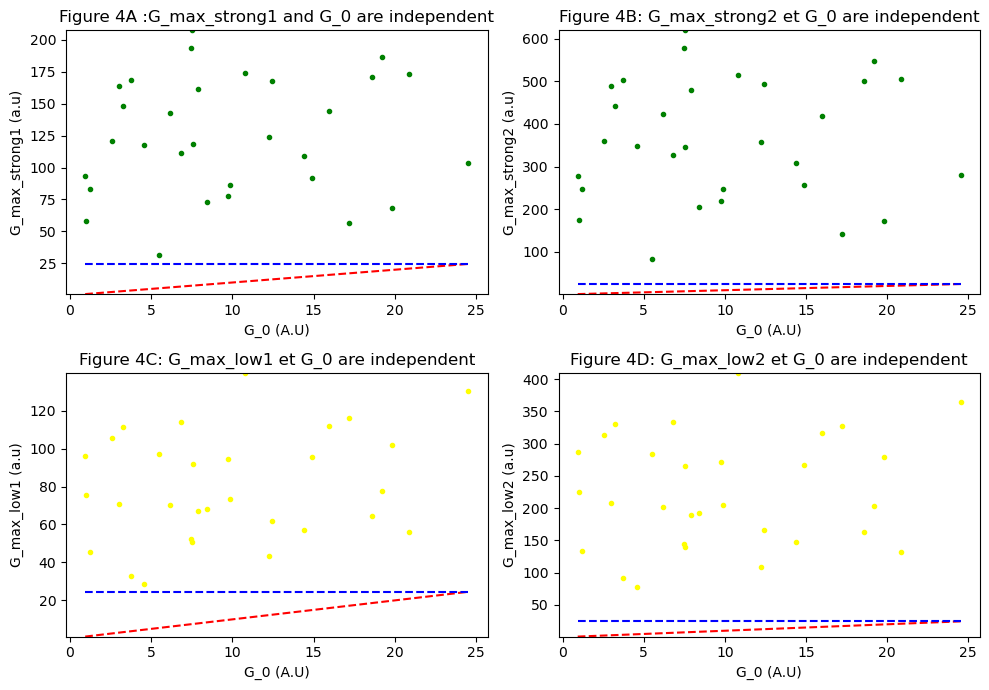

In [232]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Figure 4A: Independence of G_max_strong1 vs G_0
axes[0,0].scatter(Go,Gmax_strong1, marker = '.', color='green')
axes[0,0].set_xlabel('G_0 (A.U)')
axes[0,0].set_ylabel("G_max_strong1 (a.u)")
axes[0,0].set_title('Figure 4A :G_max_strong1 and G_0 are independent')
axes[0,0].set_ylim([np.min(Go),np.max(Gmax_strong1)])
axes[0,0].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') # G_max > G_0 condition 
axes[0,0].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.max(Go),np.max(Go),50), color = 'blue', linestyle='--') #  G_max_min > G_0_max condition

# Figure 4B: Independence of G_max_strong1 vs G_0
axes[0,1].scatter(Go,Gmax_strong2, marker = '.', color='green')
axes[0,1].set_xlabel('G_0 (A.U)')
axes[0,1].set_ylabel("G_max_strong2 (a.u)")
axes[0,1].set_title('Figure 4B: G_max_strong2 et G_0 are independent')
axes[0,1].set_ylim([np.min(Go),np.max(Gmax_strong2)])
axes[0,1].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') #  G_max > G_0 condition
axes[0,1].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.max(Go),np.max(Go),50), color = 'blue', linestyle='--') #  G_max_min > G_0_max condition

# Figure 4C: Independence of G_max_low1 vs G_0
axes[1,0].scatter(Go,Gmax_low1, marker = '.', color='yellow')
axes[1,0].set_xlabel('G_0 (A.U)')
axes[1,0].set_ylabel("G_max_low1 (a.u)")
axes[1,0].set_title('Figure 4C: G_max_low1 et G_0 are independent')
axes[1,0].set_ylim([np.min(Go),np.max(Gmax_low1)])
axes[1,0].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') #  G_max > G_0 condition
axes[1,0].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.max(Go),np.max(Go),50), color = 'blue', linestyle='--') #  G_max_min > G_0_max condition


# Figure 4D Independence of G_max_low2 vs G_0
axes[1,1].scatter(Go,Gmax_low2, marker = '.', color='yellow')
axes[1,1].set_xlabel('G_0 (A.U)')
axes[1,1].set_ylabel("G_max_low2 (a.u)")
axes[1,1].set_title('Figure 4D: G_max_low2 et G_0 are independent')
axes[1,1].set_ylim([np.min(Go),np.max(Gmax_low2)])
axes[1,1].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') #  G_max >condition
axes[1,1].plot(np.linspace(np.min(Go),np.max(Go),50),np.linspace(np.max(Go),np.max(Go),50), color = 'blue', linestyle='--') #  G_max_min > G_0_max condition


plt.tight_layout()
plt.show()

<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
d - G<sub>max</sub>/G<sub>0</sub> and G<sub>0</sub> relationship</div>  

<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
<u>Figure 5</u> : Non linear relationship between G<sub>max</sub>/G<sub>0</sub> and G<sub>0</sub></div>  

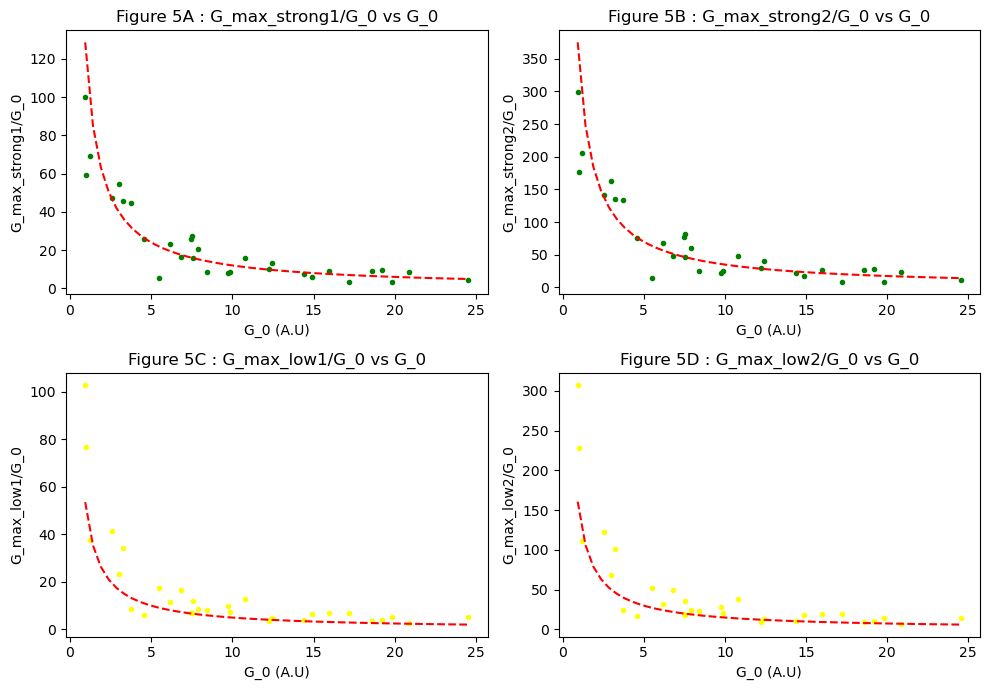

In [237]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Figure 5A: relationship between G_max_strong1/G_0 and G_0
axes[0,0].scatter(Go,Gmax_strong1/Go , marker = '.', color='green')
axes[0,0].set_xlabel('G_0 (A.U)')
axes[0,0].set_ylabel("G_max_strong1/G_0")
axes[0,0].set_title('Figure 5A : G_max_strong1/G_0 vs G_0')
axes[0,0].plot(np.linspace(np.min(Go),np.max(Go),50),120/np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') 

# Figure 5B: relationship between G_max_strong2/G_0 and G_0
axes[0,1].scatter(Go,Gmax_strong2/Go , marker = '.', color='green')
axes[0,1].set_xlabel('G_0 (A.U)')
axes[0,1].set_ylabel("G_max_strong2/G_0")
axes[0,1].set_title('Figure 5B : G_max_strong2/G_0 vs G_0')
axes[0,1].plot(np.linspace(np.min(Go),np.max(Go),50),350/np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--')

# Figure 5C: relationship between G_max_low1/G_0 and G_0
axes[1,0].scatter(Go,Gmax_low1/Go , marker = '.', color='yellow')
axes[1,0].set_xlabel('G_0 (A.U)')
axes[1,0].set_ylabel("G_max_low1/G_0")
axes[1,0].set_title('Figure 5C : G_max_low1/G_0 vs G_0')
axes[1,0].plot(np.linspace(np.min(Go),np.max(Go),50),50/np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') 

# Figure 5D: relationship between G_max_low2/G_0 and G_0
axes[1,1].scatter(Go,Gmax_low2/Go , marker = '.', color='yellow')
axes[1,1].set_xlabel('G_0 (A.U)')
axes[1,1].set_ylabel("G_max_low2/G_0")
axes[1,1].set_title('Figure 5D : G_max_low2/G_0 vs G_0')
axes[1,1].plot(np.linspace(np.min(Go),np.max(Go),50),150/np.linspace(np.min(Go),np.max(Go),50), color = 'red', linestyle='--') 


plt.tight_layout()
plt.show()

<br>  
<br>  
<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 20px;">
Preview data tables before export <br>   
= Simulated data table used for Figure 7 of the manuscript submitted to Biophysical Journal </div>  


In [252]:
print(pd.DataFrame({'Po':Po,'G_0':Go,'G_max_strong1':Gmax_strong1,'G_max_strong1/G_0':Gmax_strong1/Go,'G_max_strong2':Gmax_strong2,'G_max_strong2/G_0':Gmax_strong2/Go,'G_max_low1':Gmax_low1,'G_max_low1/G_0':Gmax_low1/Go,'G_max_low2':Gmax_low2,'G_max_low2/G_0':Gmax_low2/Go}))

          Po        G_0  G_max_strong1  G_max_strong1/G_0  G_max_strong2  \
0   0.015781   7.890579     161.658393          20.487519     479.216904   
1   0.007498   3.748889     168.222284          44.872573     502.176908   
2   0.002406   1.203021      83.079794          69.059312     247.625146   
3   0.028779  14.389594     108.866589           7.565647     309.360694   
4   0.021596  10.798067     174.235510          16.135805     515.866201   
5   0.049075  24.537309     103.914123           4.234944     279.945053   
6   0.015112   7.555803     118.171888          15.639884     346.298784   
7   0.005117   2.558426     120.899244          47.255326     360.028055   
8   0.016851   8.425302      72.850254           8.646604     206.194002   
9   0.031931  15.965671     144.589478           9.056273     419.386360   
10  0.001970   0.984877      58.468524          59.366350     173.890525   
11  0.019491   9.745333      77.633619           7.966236     218.917629   
12  0.013608

<br>  
<br>  
<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 20px;">
Data export</div> 

In [96]:
pd.DataFrame({'Po':Po,'G_0':Go,'G_max_strong1':Gmax_strong1,'G_max_strong1/G_0':Gmax_strong1/Go,'G_max_strong2':Gmax_strong2,'G_max_strong2/G_0':Gmax_strong2/Go,'G_max_low1':Gmax_low1,'G_max_low1/G_0':Gmax_low1/Go,'G_max_low2':Gmax_low2,'G_max_low2/G_0':Gmax_low2/Go}).to_csv('V4d_Simu_PUFA_strong_low.csv', sep = ';', index= False)

<br>  
<br>  
<div style="text-align: left; color: rgb(109, 7, 26); font-weight: bold; font-size: 20px;">
e - Illustration of channel fractions</div>  

<div style="text-align: left; color: rgb(50, 67, 110); font-weight: bold; font-size: 16px;">
<u>Figure 6</u> : Each channel is a square with an open probability</div>  

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

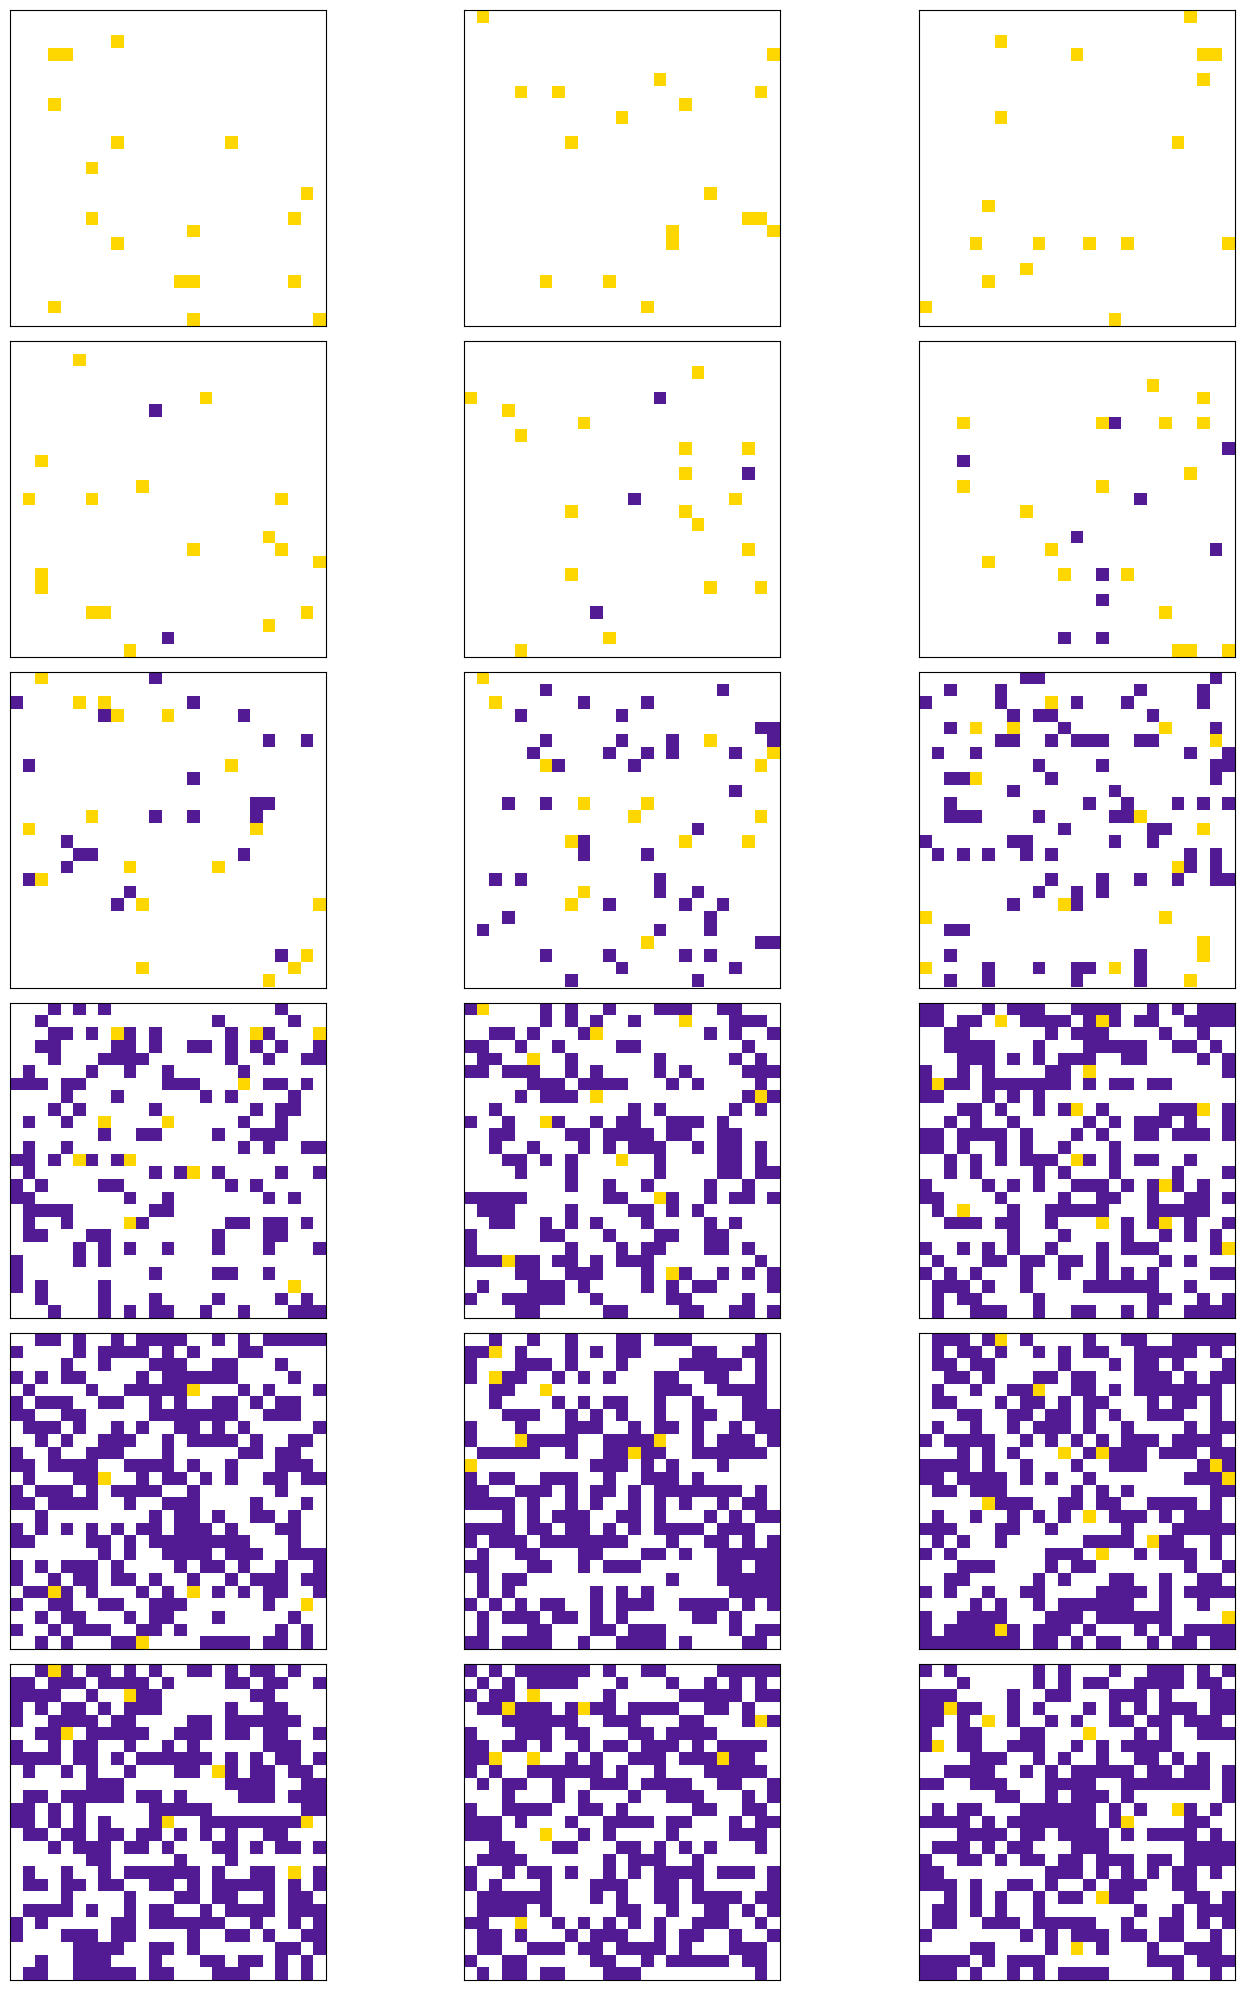

In [264]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

def f(t, a, b, c):
    return (b - c) / (1 + np.exp(-a * (t - 1))) + c

n = 25  # 25*25 = 625
for a in range(18):
    t = a * 10
    N_act = int(np.floor(f((t - 30) / 60, 5, 0.5 * n**2, 0)))
    dat1 = np.append(np.ones(int(np.floor(0.03 * 25**2))), np.zeros(int(np.ceil((1 - 0.03) * 25**2)))) * 1.0
    np.random.shuffle(dat1)
    data1 = np.resize(dat1, (n, n))

    if N_act > 0:
        dat2 = np.append(np.ones(N_act), np.zeros(n**2 - N_act)) * 2.0
        np.random.shuffle(dat2)
        data2 = np.resize(dat2, (n, n))
        colormap = ListedColormap(['#FFFFFF', '#FFD700', '#521B93'])  # White, gray, purple
    else:
        data2 = np.zeros((n, n))
        colormap = ListedColormap(['#FFFFFF', '#FFD700'])  # White, gray

    data3 = data1 + data2
    data3[data3 == 3] = 2

    axes[a // 3, a % 3].imshow(data3, cmap=colormap)
    axes[a // 3, a % 3].get_xaxis().set_visible(False)
    axes[a // 3, a % 3].get_yaxis().set_visible(False)

# Create an individual figure for each image
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(data3, cmap=colormap)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f'Image {a + 1}')

    
    filename = f'image_{a + 1}.png'
    plt.savefig(filename)
    plt.close(fig)  

plt.tight_layout()
plt.show()

##### <div style="color:black;">Conversion from Notebook to PDF</div>

In [266]:
!jupyter nbconvert --to html 2025_04_V4e_Simu_strong_low_PUFAs_effect_EN.ipynb 

[NbConvertApp] Converting notebook 2025_04_V4e_Simu_strong_low_PUFAs_effect_EN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1279332 bytes to 2025_04_V4e_Simu_strong_low_PUFAs_effect_EN.html
